In [36]:
import pandas as pd
import numpy as np
import statistics
import scipy.stats as stats

In [37]:
df = pd.read_csv('/Users/nickhiltekwani/Downloads/AI Industry Study (Responses) - new.csv')
df = df.drop('Timestamp', axis=1)

Populations are split by those who did better than a 7 on the skillset quiz, and those who did worse than a 7

- we are comparing their average company familiarity scores
- 2 sample t test (with equal variances)
- alpha is .05
- h0 = college students who are NOT as knowledgeable in AI technical skills are equally as familiar with leaders in various AI industries as college students who ARE knowledageable in AI technical skills
- h1 = college students who are more knowledageable in AI technical skills are more familiar with leaders in various AI industries

In [38]:
avg_comp_familiarity_above_50 = []
avg_comp_familiarity_below_50 = []

for i in range(len(df["Name"])):
    comp_score = df["Avg Company Familiarity"][i]
    
    if (df["Quiz Score Group"][i] == "above_50"):
        avg_comp_familiarity_above_50.append(comp_score)
    else:
        avg_comp_familiarity_below_50.append(comp_score)

In [39]:
print(np.var(avg_comp_familiarity_above_50), np.var(avg_comp_familiarity_below_50))
# population variances are equal

0.29146902042984985 0.29379478491385275


In [40]:
from scipy.stats import ttest_ind

stats.ttest_ind(a=avg_comp_familiarity_above_50, b=avg_comp_familiarity_below_50, equal_var=True)
# p > alpha, therefore we fail to reject the null hypothesis 

Ttest_indResult(statistic=1.1704211025941633, pvalue=0.2463107744891128)

Populations are split by those who did better than a 7 on the skillset quiz, and those who did worse than a 7

- we are comparing their average product familiarity scores
- 2 sample t test (with equal variances)
- alpha is .05
- h0 = college students who are NOT as knowledgeable in AI technical skills are equally as familiar with key products in various AI industries as college students who ARE knowledageable in AI technical skills
- h1 = college students who are more knowledageable in AI technical skills are more familiar with key products in various AI industries

In [41]:
avg_product_familiarity_above_50 = []
avg_product_familiarity_below_50 = []

for i in range(len(df["Name"])):
    product_score = df["Avg Product Familiarity"][i]
    
    if (df["Quiz Score Group"][i] == "above_50"):
        avg_product_familiarity_above_50.append(product_score)
    else:
        avg_product_familiarity_below_50.append(product_score)
        

In [42]:
print(np.var(avg_product_familiarity_above_50), np.var(avg_product_familiarity_below_50))
# population variances are close enough to equal

0.27846104947171013 0.3655651198279802


In [43]:
stats.ttest_ind(a=avg_product_familiarity_above_50, b=avg_product_familiarity_below_50, equal_var=True)
# alternative="greater"
# p < alpha, therefore we can reject the null hypothesis 

Ttest_indResult(statistic=2.0980379088090664, pvalue=0.0399837832779869)

2 prop z test

null hypotehsis = no diff in Field of Interest between 2 random groups



In [44]:
product_fam_mean = statistics.mean(df["Avg Product Familiarity"])
better_than_avg_product_score = df[df["Avg Product Familiarity"] >= product_fam_mean] 
worse_than_avg_product_score = df[df["Avg Product Familiarity"] < product_fam_mean] 

corp = "Corporate (Private Sector)"
non_corp = "Academia or Government"
ideal = "Ideal Industry"
excites = "Which industry excites you the most?"
barrier = "Which industry do you think has the lowest barrier of entry?"
print(product_fam_mean)
print(len(better_than_avg_product_score))
print(len(worse_than_avg_product_score))

3.4687500000625
26
38


In [45]:
print(better_than_avg_product_score[barrier].value_counts())
print(worse_than_avg_product_score[barrier].value_counts())

Government (Public Sector)    12
Corporate (Private Sector)    12
Academia/Research              2
Name: Which industry do you think has the lowest barrier of entry?, dtype: int64
Government (Public Sector)    14
Academia/Research             12
Corporate (Private Sector)    12
Name: Which industry do you think has the lowest barrier of entry?, dtype: int64


In [46]:
better_group_proportion = 12/15
worse_group_proportion = 12/38
print(better_group_proportion)
print(worse_group_proportion)

0.8
0.3157894736842105


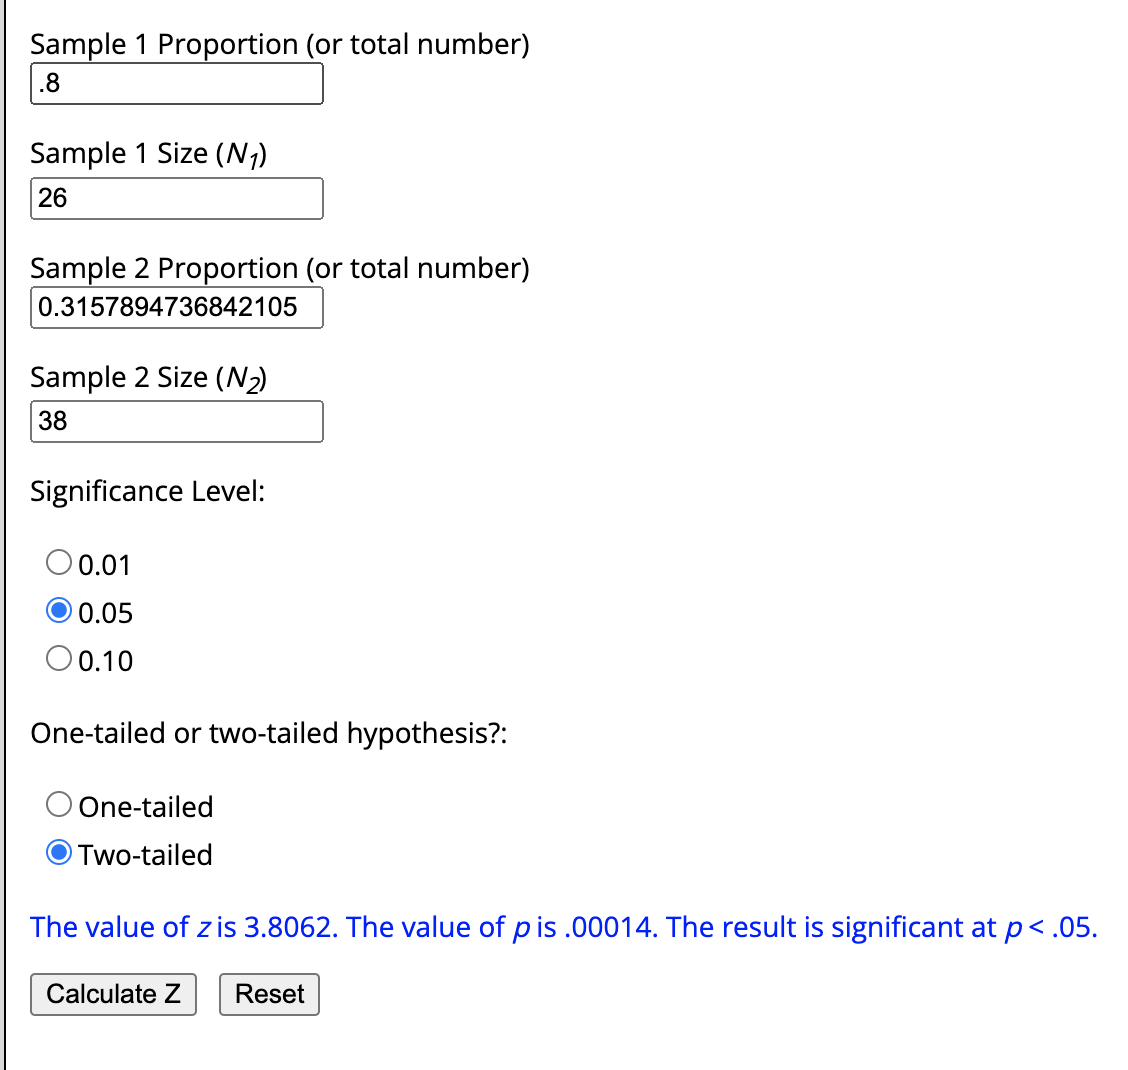